Yelp Review Classification using Natural Language Processing

Problem Statement:
    We are going to interpret whether review is a 5 star review or 1 star review by using Natural Language Processing techniques and using Naive Bayes Classifier

Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

Loading the dataset

In [3]:
yelp_df=pd.read_csv('yelp.csv')

Analysing shape of the dataset

In [4]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp_df.shape

(10000, 10)

In [6]:
yelp_df.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [7]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [8]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
yelp_df['text'].iloc[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

Calculating length of the review and adding it as a new column

In [10]:
yelp_df['Length']=yelp_df['text'].apply(len)

In [11]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


Basic Visualisation of how many people gave stars among 5 in yelp reviews in pieplot

Text(0.5, 1.0, 'User Reviews based on star ratings')

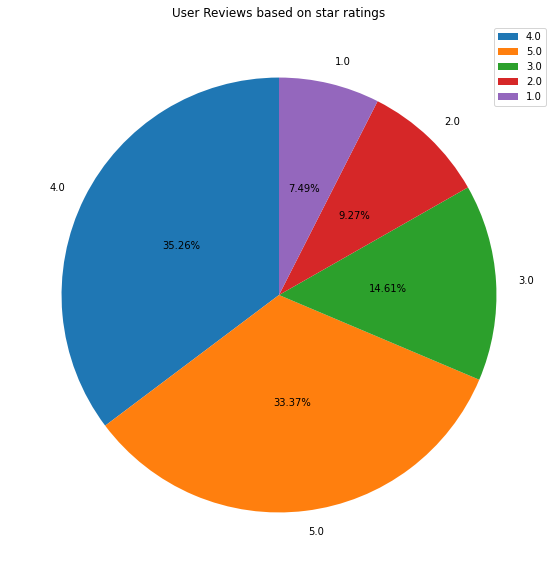

In [53]:
plt.rcParams['figure.figsize']=[10,10]
yelp_df['stars'].value_counts().plot(kind='pie',startangle=90,autopct='%.2f%%',pctdistance=0.5,labels=yelp_df['stars'].value_counts().index)
plt.legend()
plt.axis('off')
plt.title('User Reviews based on star ratings')

33% people gave 5 star rating and nearly 7.4% of users gave 1 star rating

Horizontal plot to visualize the count of people who has given ratings among 5 stars

No handles with labels found to put in legend.


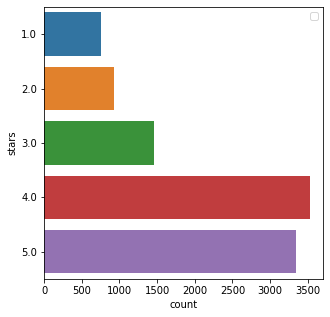

In [32]:
plt.rcParams['figure.figsize']=[5,5]
sns.countplot(y="stars",data=yelp_df)
plt.legend()
plt.show()

Getting numerical statistics on a 'Length' column

In [36]:
yelp_df['Length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: Length, dtype: float64

In [40]:
yelp_df['text'].iloc[1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [69]:
yelp_df[yelp_df['Length']==1]['text'].iloc[0]

'X'

In [70]:
yelp_df[yelp_df['Length']==4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [71]:
yelp_df[yelp_df['Length']==710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

Plotting a histogram on how the users rated among 5 stars for yelp reviews

(array([ 749.,    0.,  927.,    0.,    0., 1461.,    0., 3526.,    0.,
        3337.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

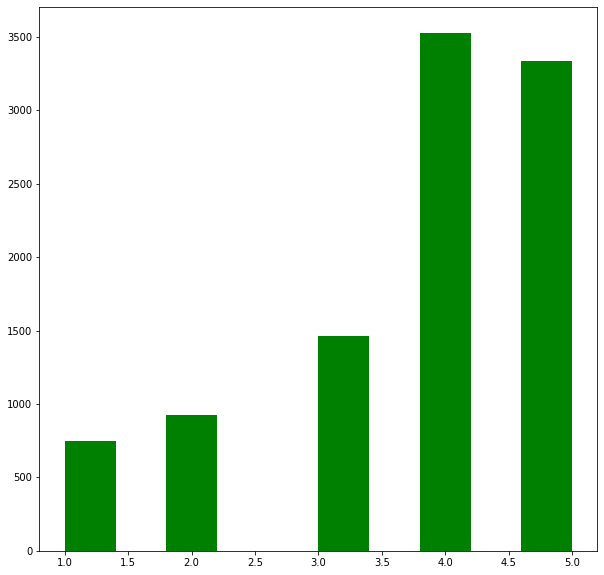

In [43]:
plt.hist(yelp_df['stars'],bins=10,color='green')

Visualisation of how the users has given reviews based on length of the review provided. Comparing the ratings with length of the reviews

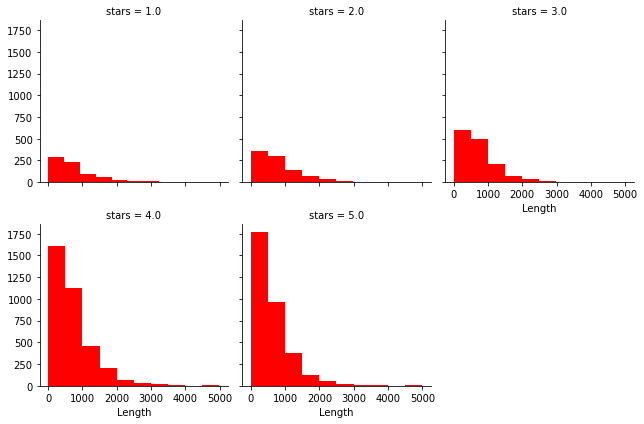

In [57]:
g=sns.FacetGrid(col='stars',col_wrap=3,data=yelp_df)
g.map(plt.hist,'Length',color='red')

Separating 1 star, 3 star, 5 star reviews from the dataset

In [73]:
yelp_df_1=yelp_df[yelp_df['stars']==1]
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1.0,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1.0,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1.0,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1.0,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1.0,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1.0,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1.0,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1.0,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1.0,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [159]:
yelp_df_3=yelp_df[yelp_df['stars']==3]
yelp_df_3

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
16,supigcPNO9IKo6olaTNV-g,2008-10-12,HXP_0Ul-FCmA4f-k9CqvaQ,3.0,We went here on a Saturday afternoon and this ...,review,SBbftLzfYYKItOMFwOTIJg,3,4,2,1469
18,b5cEoKR8iQliq-yT2_O0LQ,2009-03-06,v0cTd3PNpYCkTyGKSpOfGA,3.0,I met a friend for lunch yesterday. \n\nLoved ...,review,UsULgP4bKA8RMzs8dQzcsA,5,6,4,1161
20,8FNO4D3eozpIjj0k3q5Zbg,2008-10-08,MuqugTuR5DdIPcZ2IVP3aQ,3.0,DVAP....\n\nYou have to go at least once in yo...,review,C6IOtaaYdLIT5fWd7ZYIuA,2,4,1,565
34,3oLy0rlzRI_xiqfQHqC4_g,2011-03-27,Bk7F8IyBuOHVp6w3BAKVow,3.0,There's two ways to look at this place. One is...,review,1guJDgUfTiDdbgKqBhsZFQ,1,3,1,610
45,qB-qsaSnhbHCt18_AN4Quw,2011-12-21,1FvrC35rTJ6BWFvRog7tuA,3.0,Everything was nice. The ice cream was delicio...,review,66PQJEHC0tCWGMI4V9KT-Q,0,0,0,243
...,...,...,...,...,...,...,...,...,...,...,...
9967,qNqvJIH4_KENAajUfRZKoA,2012-10-29,UoxTfwbLylXWpwrn8tYEeQ,3.0,I thought I had reviewed this location already...,review,VPXgY9lGJF3XC4ZpusxNuA,1,1,1,392
9968,HIiVx2mseVWKtx8TKfWC_A,2010-06-07,TrFMPwWeaCWu8yDVWVkYwA,3.0,I have never been here before so I didn't know...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,2,1,1799
9976,iDYzGVIF1TDWdjHNgNjCVw,2009-09-11,bKjMcpNj0xSu2UI2EFQn1g,3.0,I was looking for chile rellenos and this plac...,review,2tUCLMHQKz4kA1VlRB_w0Q,0,0,0,465
9983,24V8QQWO6VaVggHdxjQQ_A,2010-06-06,PqiIeFOiVr-tj_FtHGAH2g,3.0,3.5 stars. \n\nWe decided to check this place ...,review,LaEj3VpQh7bgpAZLzSRRrw,1,4,1,861


In [74]:
yelp_df_5=yelp_df[yelp_df['stars']==5]
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5.0,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5.0,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5.0,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5.0,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5.0,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5.0,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5.0,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5.0,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5.0,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [237]:
yelp_df_1['text'].iloc[5]

'Not busy at all but took nearly 45 min to get our meal.  Ordered the trout and was shocked to see lots and lots of bones. Hmmmmm. Well asked the waitress about it and she said "they try the best they can"  hmmmmmm isn\'t this a "fish" restaurant? \nThey comped the trout but still not sure I would go back.'

In [160]:
yelp_df_3['text'].iloc[3]

"There's two ways to look at this place. One is getting quality food at a good price. The other is getting a lot of food for a cheap price. I prefer the former but those who prefer the latter won't agree with my review.\n\nI thought the scramble I had was okay but nothing fantastic. I definitely didn't care for the biscuits. The food wasn't health conscious at all but if you're looking to fill up with calories and get a good-sized portion then this is your type of place. Also, I am not a fan of the diner-type ambiance... I would rather have something with more character but I'm glad I tried this place out."

In [236]:
yelp_df_5['text'].iloc[5]

'Nobuo shows his unique talents with everything on the menu. Carefully crafted features with much to drink. Start with the pork belly buns and a stout. Then go on until you can no longer.'

Concatenating 1 star, 3 star and 5 star reviews

In [165]:
yelp_df_1_3_5=pd.concat([yelp_df_1,yelp_df_3,yelp_df_5])

Calculating individual star percentage contributing to the total reviews

In [166]:
print('Percentage of yelp_df_1 star rating:',(100*len(yelp_df_1)/len(yelp_df_1_3_5)),'%')

Percentage of yelp_df_1 star rating: 13.50279430322697 %


In [167]:
print('Percentage of yelp_df_1 star rating:',(100*len(yelp_df_5)/len(yelp_df_1_3_5)),'%')

Percentage of yelp_df_1 star rating: 60.15864431224085 %


In [168]:
print('Percentage of yelp_df_3 star rating:',(100*len(yelp_df_3)/len(yelp_df_1_3_5)),'%')

Percentage of yelp_df_3 star rating: 26.33856138453218 %


BarPlot showing how many people has given reviews among 5 stars

<AxesSubplot:xlabel='stars', ylabel='count'>

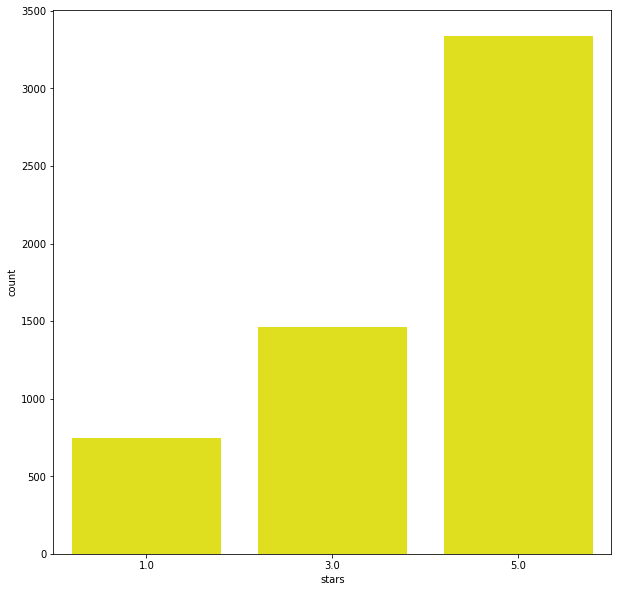

In [169]:
plt.rcParams['figure.figsize']=[10,10]
sns.countplot(yelp_df_1_3_5['stars'],color='yellow')

Text cleaning:
    1)Punctuation Removal

In [170]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

2)StopWord Removal

In [171]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Applying text cleaning techniques to our review dataset

In [175]:
def text(message):
    message_punc_removed= [char for char in message if char.lower() not in string.punctuation]
    message_punc_removed=''.join(message_punc_removed)
    message_punc_removed_stopwords=[word for word in message_punc_removed.split() if word not in stopwords.words('english')]
    return message_punc_removed_stopwords

In [176]:
yelp_df_clean=yelp_df_1_3_5['text'].apply(text)

Comparing the original text with cleaned text such as punctuation removal and stopword removal

In [177]:
print(yelp_df_1_3_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [178]:
print(yelp_df_clean[0])

['My', 'wife', 'took', 'birthday', 'breakfast', 'excellent', 'The', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'Our', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'It', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'Do', 'favor', 'get', 'Bloody', 'Mary', 'It', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'It', 'amazing', 'While', 'EVERYTHING', 'menu', 'looks', 'excellent', 'I', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'It', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'It', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'I', 'cant', 'wait', 'go', 'back']


In [179]:
yelp_df_1_3_5['Length'].describe()

count    5547.000000
mean      687.371192
std       609.997510
min         1.000000
25%       277.000000
50%       520.000000
75%       901.500000
max      4986.000000
Name: Length, dtype: float64

Getting the largest review and comparing the original with the cleaned review version

In [183]:
yelp_df_1_3_5[yelp_df_1_3_5['Length']==4986]['text'].iloc[0]

'Owned and operated by Eugenia Theodosopoulos (an Ohio native, fyi) and considered by many to be the best patisserie/bakery in the state I approached Essence with a note of skepticism largely assuming much of the hype was derived from Tempe\'s plethoric college crowd but arriving at the doors of the small shop on a particularly lovely 80 degree morning I gathered quite quickly that my original conceptions were misplaced; not only does Essence not look like a college haunt, neither do its prices or products - a vast selection of at least twenty items aside from the posted menu sitting beneath and atop a glass case forcing me to make more than one tough decision that was not helped by my server\'s accurate assessment that everything was really good.\n\nNow bearing in mind that the original impetus to visit Tempe on this particular morning was to visit Caffe Boa and that Essence was more of \'pre-meal\' activity what follows may seem slightly gluttonous, but to be fair once I took my firs

In [184]:
yelp_df_1_3_5[yelp_df_1_3_5['Length']==4986]['text']

2622    Owned and operated by Eugenia Theodosopoulos (...
Name: text, dtype: object

In [185]:
print(yelp_df_clean[2622])

['Owned', 'operated', 'Eugenia', 'Theodosopoulos', 'Ohio', 'native', 'fyi', 'considered', 'many', 'best', 'patisseriebakery', 'state', 'I', 'approached', 'Essence', 'note', 'skepticism', 'largely', 'assuming', 'much', 'hype', 'derived', 'Tempes', 'plethoric', 'college', 'crowd', 'arriving', 'doors', 'small', 'shop', 'particularly', 'lovely', '80', 'degree', 'morning', 'I', 'gathered', 'quite', 'quickly', 'original', 'conceptions', 'misplaced', 'Essence', 'look', 'like', 'college', 'haunt', 'neither', 'prices', 'products', 'vast', 'selection', 'least', 'twenty', 'items', 'aside', 'posted', 'menu', 'sitting', 'beneath', 'atop', 'glass', 'case', 'forcing', 'make', 'one', 'tough', 'decision', 'helped', 'servers', 'accurate', 'assessment', 'everything', 'really', 'good', 'Now', 'bearing', 'mind', 'original', 'impetus', 'visit', 'Tempe', 'particular', 'morning', 'visit', 'Caffe', 'Boa', 'Essence', 'premeal', 'activity', 'follows', 'may', 'seem', 'slightly', 'gluttonous', 'fair', 'I', 'took',

Using CountVectorizer and converting the feature names to zeros and ones

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=text)
yelp_vectorizer=vectorizer.fit_transform(yelp_df_1_3_5['text'])

In [187]:
print(vectorizer.get_feature_names())

['0', '00s', '01', '01042012', '022010', '03342', '039oz', '04052012', '05', '050', '06', '07092008', '072511', '075', '09', '090', '095', '099', '1', '10', '100', '1000', '10000', '100000', '1000am', '1000pm', '1000x', '1001', '100150', '1002', '1007', '100s', '100th', '100yearold', '101', '1011', '1012', '1012glass', '101412', '1015', '102', '1025', '102729', '1030', '103011', '1030330', '1030pm', '10312012', '104', '105', '1050', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10cocktail', '10each', '10for', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10pm2am', '10th', '10thand', '10x', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '110th', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1183', '1195

In [188]:
print(yelp_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [189]:
label=yelp_df_1_3_5['stars'].values
label

array([1., 1., 1., ..., 5., 5., 5.])

Using Naive Bayes Classification Algorithm to classify the reviews and predict whether its 1 star, 3 star or its a 5 star review

In [190]:
x=yelp_vectorizer
label=yelp_df_1_3_5['stars'].values
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
yelp_NB_classifier=NB_classifier.fit(x,label)

Predicting 1 star review

In [191]:
test_1=['I have always been a fan of Burlington\'s deals, however I will not be shopping at this one again. I went to return a belt... pretty simple. Instead, I stood in the customer service line for 15 minutes thanks to an employee of Burlington buying/putting things on layaway. It took three other staff to help her out. There were no words said to me except "Hold on". I was pissed. When the lady was finally done, the employee at the service asked "what do you want?" Serious help is needed there!\n If you work in the area of "customer service" I think you should have some.']
test_1_countvectorizer=vectorizer.transform(test_1)
yelp_predict=NB_classifier.predict(test_1_countvectorizer)
yelp_predict

array([1.])

Predicting 5 star review

In [192]:
test_2=['General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I\'d be surprised if you don\'t walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it\'s how we recover from them that is important"!!!\n\nThanks to Scott and his awesome staff. You\'ve got a customer for life!! .......... :^']
test_2_countvectorizer=vectorizer.transform(test_2)
test_2_predict=NB_classifier.predict(test_2_countvectorizer)
test_2_predict

array([5.])

Predicting 3 star review

In [194]:
test_3=["There'stwo ways to look at this place. One is getting quality food at a good price. The other is getting a lot of food for a cheap price. I prefer the former but those who prefer the latter won't'agree with my review.\n\nI thought the scramble I had was okay but nothing fantastic. I definitely didn't care for the biscuits. The food wasn't health conscious at all but if you're looking to fill up with calories and get a good-sized portion then this is your type of place. Also, I am not a fan of the diner-type ambiance... I would rather have something with more character but I'm glad I tried this place out."]
test_3_countvectorizer=vectorizer.transform(test_3)
yelp_predict=NB_classifier.predict(test_3_countvectorizer)
yelp_predict

array([3.])

In [195]:
x=yelp_vectorizer
y=label
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)



Getting shape of the training and testing set

In [196]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(xtest.shape)

(4437, 31550)
(1110, 31550)
(4437,)
(1110, 31550)


Using Naive Bayes classification algorithm on training and test set

In [197]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
yelp_NB_classifier_train=NB_classifier.fit(xtrain,ytrain)


Evaluating our training dataset

In [198]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_train=NB_classifier.predict(xtrain)
y_predict_train

array([5., 5., 5., ..., 5., 1., 5.])

<AxesSubplot:>

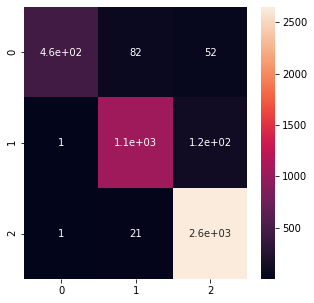

In [199]:
cm=confusion_matrix(ytrain,y_predict_train)
plt.rcParams['figure.figsize']=[5,5]
sns.heatmap(cm,annot=True)

In [200]:
print(classification_report(ytrain,y_predict_train))

              precision    recall  f1-score   support

         1.0       1.00      0.77      0.87       594
         3.0       0.91      0.90      0.90      1173
         5.0       0.94      0.99      0.96      2670

    accuracy                           0.94      4437
   macro avg       0.95      0.89      0.91      4437
weighted avg       0.94      0.94      0.94      4437



Evaluating our test dataset

In [201]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=NB_classifier.predict(xtest)
y_predict_test

array([3., 5., 5., ..., 5., 3., 5.])

<AxesSubplot:>

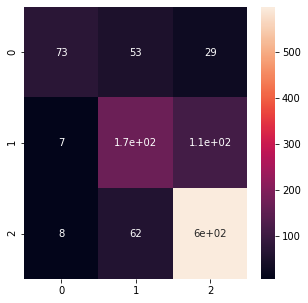

In [202]:
cm=confusion_matrix(ytest,y_predict_test)
plt.rcParams['figure.figsize']=[5,5]
sns.heatmap(cm,annot=True)

In [203]:
print(classification_report(ytest,y_predict_test))

              precision    recall  f1-score   support

         1.0       0.83      0.47      0.60       155
         3.0       0.60      0.59      0.59       288
         5.0       0.81      0.90      0.85       667

    accuracy                           0.76      1110
   macro avg       0.75      0.65      0.68      1110
weighted avg       0.76      0.76      0.75      1110



Concatenating 1 star and 5 star review only

In [205]:
yelp_df_1_5=pd.concat([yelp_df_1,yelp_df_5])
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1.0,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1.0,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1.0,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1.0,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1.0,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5.0,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5.0,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5.0,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5.0,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


Calculating the percentage of 1 star and 5 star reviews present in the taken set

In [206]:
print('Percentage of yelp_df_1 star rating:',(100*len(yelp_df_1)/len(yelp_df_1_5)),'%')

Percentage of yelp_df_1 star rating: 18.330885952031327 %


In [207]:
print('Percentage of yelp_df_5 star rating:',(100*len(yelp_df_5)/len(yelp_df_1_5)),'%')

Percentage of yelp_df_5 star rating: 81.66911404796868 %


BarPlot which show how many people has given 5 star and 1 star for reviews

<AxesSubplot:xlabel='stars', ylabel='count'>

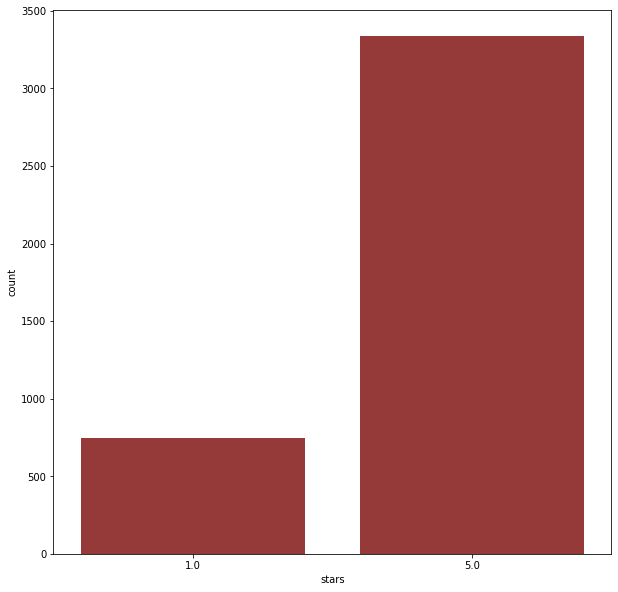

In [208]:
plt.rcParams['figure.figsize']=[10,10]
sns.countplot(yelp_df_1_5['stars'],color='brown')

Applying text cleaning such as punctuation removal and stopwords from the dataset

In [210]:
def text(message):
    message_punc_removed= [char for char in message if char.lower() not in string.punctuation]
    message_punc_removed=''.join(message_punc_removed)
    message_punc_removed_stopwords=[word for word in message_punc_removed.split() if word not in stopwords.words('english')]
    return message_punc_removed_stopwords

In [209]:
yelp_df_clean=yelp_df_1_5['text'].apply(text)

Comparing the original data with the cleaned version of review

In [212]:
print(yelp_df_1_5['text'][1])

I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.

In any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here's The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone

In [213]:
print(yelp_df_clean[1])

['I', 'idea', 'people', 'give', 'bad', 'reviews', 'place', 'It', 'goes', 'show', 'please', 'everyone', 'They', 'probably', 'griping', 'something', 'faultthere', 'many', 'people', 'like', 'In', 'case', 'friend', 'I', 'arrived', '550', 'PM', 'past', 'Sunday', 'It', 'pretty', 'crowded', 'I', 'thought', 'Sunday', 'evening', 'thought', 'would', 'wait', 'forever', 'get', 'seat', 'said', 'well', 'seated', 'girl', 'comes', 'back', 'seating', 'someone', 'else', 'We', 'seated', '552', 'waiter', 'came', 'got', 'drink', 'orders', 'Everyone', 'pleasant', 'host', 'seated', 'us', 'waiter', 'server', 'The', 'prices', 'good', 'well', 'We', 'placed', 'orders', 'decided', 'wanted', '602', 'We', 'shared', 'baked', 'spaghetti', 'calzone', 'small', 'Heres', 'The', 'Beef', 'pizza', 'try', 'The', 'calzone', 'huge', 'got', 'smallest', 'one', 'personal', 'got', 'small', '11', 'pizza', 'Both', 'awesome', 'My', 'friend', 'liked', 'pizza', 'better', 'I', 'liked', 'calzone', 'better', 'The', 'calzone', 'sweetish', 

Getting numerical statistics for the length column

In [214]:
yelp_df_1_5['Length'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: Length, dtype: float64

Comparing the mean review of cleaned version with the original review

In [215]:
yelp_df_1_5[yelp_df_1_5['Length']==662]['text'].iloc[0]

"Coming from a French family on my mom's side it is ingrained in my genes to love cooking, food, and shops like Sur La Table...oh and also wine and cheese...what a tough life I live!\n\nSur La Table is a classy cooking shop which offers high end cooking ware, appliances, and also dishes. Somethings in the store can be pricey, but you can also find good deals as well. They offer many cooking things you wouldn't find at your average Crate and Barrel for more complicated cooking endeavors. I have also found some cute cookie cutters here for my mom's collection. The staff was all very helpful and knowledgeable. and many Sur La Table's now offer cooking classes!"

In [227]:
yelp_df_1_5[yelp_df_1_5['Length']==662]['text']

3571    Coming from a French family on my mom's side i...
7169    Habaneros is an awesome little gem stuck in th...
Name: text, dtype: object

In [228]:
print(yelp_df_clean[3571])

['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'I', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'They', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'I', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'The', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']


Using CountVectorizer to convert the review into zeros and ones

In [231]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=text)
yelp_vectorizer=vectorizer.fit_transform(yelp_df_1_5['text'])

In [232]:
print(vectorizer.get_feature_names())

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

Getting the output column and storing as label which we need to predict

In [233]:
label=yelp_df_1_5['stars'].values
label

array([1., 1., 1., ..., 5., 5., 5.])

Using Naive Bayes Classification algorithm to predict the star rating

In [238]:
x=yelp_vectorizer
label=yelp_df_1_5['stars'].values
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
yelp_NB_classifier=NB_classifier.fit(x,label)

Predicting 1 star review

In [240]:
test_1a=['Not busy at all but took nearly 45 min to get our meal.  Ordered the trout and was shocked to see lots and lots of bones. Hmmmmm. Well asked the waitress about it and she said "they try the best they can"  hmmmmmm isn\'t this a "fish" restaurant? \nThey comped the trout but still not sure I would go back.']
test_1_countvectorizer=vectorizer.transform(test_1a)
yelp_predict=NB_classifier.predict(test_1_countvectorizer)
yelp_predict

array([1.])

Predicting 5 star review

In [241]:
test_2a=['Nobuo shows his unique talents with everything on the menu. Carefully crafted features with much to drink. Start with the pork belly buns and a stout. Then go on until you can no longer.']
test_2_countvectorizer=vectorizer.transform(test_2a)
test_2_predict=NB_classifier.predict(test_2_countvectorizer)
test_2_predict

array([5.])

Splitting the data into training and test set and evaluation is done further

In [242]:
x=yelp_vectorizer
y=label
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

Getting shape of the training and test test

In [243]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(xtest.shape)

(3268, 26639)
(818, 26639)
(3268,)
(818, 26639)


Using Naive Bayes classification Algorithm to predict the star ratings

In [244]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
yelp_NB_classifier_train=NB_classifier.fit(xtrain,ytrain)

Evaluating the training set

In [245]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_train=NB_classifier.predict(xtrain)
y_predict_train

array([5., 5., 5., ..., 5., 1., 5.])

<AxesSubplot:>

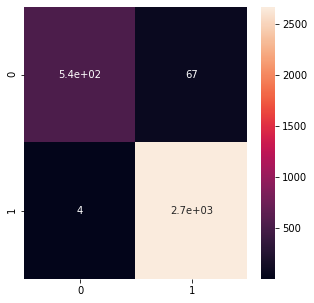

In [246]:
cm=confusion_matrix(ytrain,y_predict_train)
plt.rcParams['figure.figsize']=[5,5]
sns.heatmap(cm,annot=True)

In [247]:
print(classification_report(ytrain,y_predict_train))

              precision    recall  f1-score   support

         1.0       0.99      0.89      0.94       602
         5.0       0.98      1.00      0.99      2666

    accuracy                           0.98      3268
   macro avg       0.98      0.94      0.96      3268
weighted avg       0.98      0.98      0.98      3268



Evaluating the test set

In [248]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_test=NB_classifier.predict(xtest)
y_predict_test

array([5., 5., 5., 5., 1., 5., 5., 1., 5., 5., 5., 5., 1., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 1.,
       5., 1., 5., 5., 1., 5., 5., 5., 5., 5., 1., 5., 5., 1., 5., 5., 5.,
       5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 1., 5.,
       5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       1., 1., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       1., 5., 5., 5., 5., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 5., 1.,
       5., 5., 5., 1., 5., 1., 5., 1., 5., 1., 5., 5., 5., 1., 5., 1., 5.,
       5., 5., 1., 5., 5., 5., 5., 1., 5., 5., 5., 5., 5., 1., 5., 5., 5.,
       5., 1., 5., 5., 1., 5., 5., 1., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 1., 5.

<AxesSubplot:>

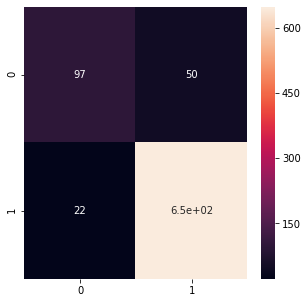

In [249]:
cm=confusion_matrix(ytest,y_predict_test)
plt.rcParams['figure.figsize']=[5,5]
sns.heatmap(cm,annot=True)

In [250]:
print(classification_report(ytest,y_predict_test))

              precision    recall  f1-score   support

         1.0       0.82      0.66      0.73       147
         5.0       0.93      0.97      0.95       671

    accuracy                           0.91       818
   macro avg       0.87      0.81      0.84       818
weighted avg       0.91      0.91      0.91       818



Conclusion:

Our model gives us accuracy of 76% when we consider 1 star, 3 star, and 5 star ratings. But when we considered 1 star and 5 star ratings we achieved 91 % accuracy